In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_BloodPressure.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Patient ID                     100 non-null    int64
 1    Blood Pressure Before (mmHg)  100 non-null    int64
 2    Blood Pressure After (mmHg)   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [4]:
data.isnull().sum()

Patient ID                       0
 Blood Pressure Before (mmHg)    0
 Blood Pressure After (mmHg)     0
dtype: int64

In [5]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [6]:
data.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [9]:
data.columns = data.columns.str.strip()

In [10]:
before_bp = data['Blood Pressure Before (mmHg)']
after_bp = data['Blood Pressure After (mmHg)']

# a. Measure the dispersion in both and interpret the results.

In [11]:
dispersion_before = np.var(before_bp)
dispersion_after = np.var(after_bp)
print("Dispersion in 'Blood Pressure Before':", dispersion_before)
print("Dispersion in 'Blood Pressure After':", dispersion_after)

Dispersion in 'Blood Pressure Before': 43.10189999999998
Dispersion in 'Blood Pressure After': 46.97040000000002


# b. Calculate mean and 5% confidence interval and plot it in a graph

In [12]:
mean_before = np.mean(before_bp)
confidence_interval_before = stats.t.interval(0.95, len(before_bp)-1, loc=mean_before, scale=stats.sem(before_bp))
print("Mean 'Blood Pressure Before':", mean_before)
print("Confidence Interval for 'Blood Pressure Before' (95%):", confidence_interval_before)

Mean 'Blood Pressure Before': 133.91
Confidence Interval for 'Blood Pressure Before' (95%): (132.60075849172767, 135.21924150827232)


# c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

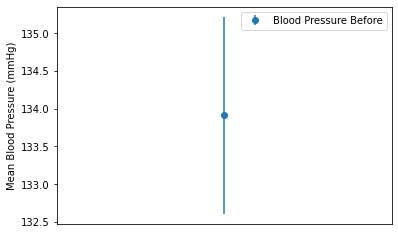

In [13]:
# Plot the mean and confidence interval for 'Blood Pressure Before'
plt.errorbar(1, mean_before, yerr=(confidence_interval_before[1] - mean_before), fmt='o', label='Blood Pressure Before')
plt.xticks([])
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.legend()
plt.show()

In [14]:
# Calculate the mean absolute deviation and standard deviation for 'Blood Pressure After'
mad_after = np.mean(np.abs(after_bp - np.mean(after_bp)))
std_after = np.std(after_bp)
print("Mean Absolute Deviation of 'Blood Pressure After':", mad_after)
print("Standard Deviation of 'Blood Pressure After':", std_after)

Mean Absolute Deviation of 'Blood Pressure After': 5.9
Standard Deviation of 'Blood Pressure After': 6.853495458523338


# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [15]:
correlation_coef, p_value = stats.pearsonr(before_bp, after_bp)
print("Correlation Coefficient:", correlation_coef)
print("p-value:", p_value)
if p_value < 0.01:
    print("The correlation coefficient is significant at 1% level of significance.")
else:
    print("The correlation coefficient is not significant at 1% level of significance.")

Correlation Coefficient: 0.9779485966556026
p-value: 1.8097381433037623e-68
The correlation coefficient is significant at 1% level of significance.
